In [32]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\liaoh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from statsmodels.tsa.stattools import adfuller

In [34]:
file_name1 = "monthly sea level.txt"
file_name2 = "monthly air temp.txt"
file_name3 = "monthly water temp.txt"
file_name4 = "dailySL1993-2018.csv"
# f = open(file_name, "r")
# print(f.read())

sl_monthly_df = pd.read_csv(file_name1,header=2,delimiter='\s+')
at_monthly_df = pd.read_csv(file_name2,header=2,delimiter='\s+')
wt_monthly_df = pd.read_csv(file_name3,header=2,delimiter='\s+')
sl_daily_df = pd.read_csv(file_name4, header=None)
sl_monthly_df

,Mth,Year,Gaps,Good,Minimum,Maximum,Mean,St,Devn
0,3,1993,5520,1920,1.270,2.798,2.006,0.397,NaN
1,4,1993,7004,196,1.513,2.425,1.956,0.300,NaN
2,5,1993,2640,4800,1.041,2.712,1.874,0.408,NaN
3,6,1993,0,7200,0.947,2.880,1.892,0.460,NaN
4,7,1993,0,7440,0.924,2.958,1.912,0.460,NaN
...,...,...,...,...,...,...,...,...,...
355,10,2022,118,7322,1.169,3.090,2.095,0.458,NaN
356,11,2022,2,7198,1.171,3.167,2.111,0.450,NaN
357,12,2022,0,7440,1.100,3.180,2.122,0.442,NaN
358,1,2023,1,7439,1.107,3.287,2.156,0.441,NaN


In [35]:
sl_daily_df.columns = ["Year","Month","Day","Sea_Level(mm)"]
sl_daily_df.loc[(sl_daily_df["Year"] ==1993) & (sl_daily_df["Month"] == 10)]
sl_daily_df.loc[(sl_daily_df["Year"] ==2012) & (sl_daily_df["Month"] == 7)]
#sl_daily_df.loc[(sl_daily_df["Year"] ==2019) & (sl_daily_df["Month"] == 9)]
#sl_monthly_df
sl_daily_df.loc[sl_daily_df["Sea_Level(mm)"] < 0]

,Year,Month,Day,Sea_Level(mm)
8,1993,4,1,-32767
9,1993,4,2,-32767
10,1993,4,3,-32767
11,1993,4,4,-32767
12,1993,4,5,-32767
...,...,...,...,...
8977,2017,10,21,-32767
8978,2017,10,22,-32767
8979,2017,10,23,-32767
8980,2017,10,24,-32767


## Clear Dataset: transform datetime into time series form 

In [36]:
df1 = sl_monthly_df[sl_monthly_df['Mean'].isnull().values]
df2 = sl_monthly_df[sl_monthly_df['Maximum'].isnull().values]
df3 = sl_monthly_df[sl_monthly_df['Minimum'].isnull().values]
print(pd.concat([df1, df2, df3]).drop_duplicates(['Mth','Year']).reset_index(drop=True)[['Mth','Year']])

df1 = at_monthly_df[at_monthly_df['Mean'].isnull().values]
df2 = at_monthly_df[at_monthly_df['Maximum'].isnull().values]
df3 = at_monthly_df[at_monthly_df['Minimum'].isnull().values]
print(pd.concat([df1, df2, df3]).drop_duplicates(['Mth','Year']).reset_index(drop=True)[['Mth','Year']])

df1 = wt_monthly_df[wt_monthly_df['Mean'].isnull().values]
df2 = wt_monthly_df[wt_monthly_df['Maximum'].isnull().values]
df3 = wt_monthly_df[wt_monthly_df['Minimum'].isnull().values]
print(pd.concat([df1, df2, df3]).drop_duplicates(['Mth','Year']).reset_index(drop=True)[['Mth','Year']])

   Mth  Year
0   10  1993
1    7  2012
2    9  2019
    Mth  Year
0    10  1993
1     7  1996
2     7  2004
3     8  2004
4     9  2004
5    10  2004
6    11  2004
7    12  2004
8     1  2005
9     2  2005
10    3  2005
11    4  2005
12    5  2005
13    6  2005
14    2  2008
15    3  2008
16    4  2008
17    5  2008
18    6  2008
19    7  2008
20    8  2008
21    9  2008
22   10  2008
23    4  2011
24    5  2011
25    6  2011
26    7  2011
27    8  2011
28    9  2011
29   10  2011
30   11  2011
31   12  2011
32    1  2012
33    2  2012
34    3  2012
35    4  2012
36    5  2012
37    6  2012
38    7  2012
39   12  2012
40    1  2013
41    2  2013
42    3  2013
43    4  2013
44    5  2013
45    6  2013
46    7  2013
47    8  2013
48    9  2013
49   10  2013
50    9  2019
    Mth  Year
0    10  1993
1     5  2009
2     6  2009
3     4  2011
4     5  2011
5     6  2011
6     7  2011
7     8  2011
8     9  2011
9    10  2011
10   11  2011
11   12  2011
12    1  2012
13    2  2012
14    3  2

In [37]:
#sl_monthly_df['DATE'] = pd.to_datetime(sl_monthly_df[['Year', 'Mth']].assign(DAY=1))
#sl_monthly_df.info()

sl_monthly_df['Date'] = pd.to_datetime(sl_monthly_df.Year.astype(str) + '/' + sl_monthly_df.Mth.astype(str) + '/01')
sl_monthly_df.drop(['Year', 'Mth'], axis=1, inplace=True)

at_monthly_df['Date'] = pd.to_datetime(at_monthly_df.Year.astype(str) + '/' + at_monthly_df.Mth.astype(str) + '/01')
at_monthly_df.drop(['Year', 'Mth'], axis=1, inplace=True)

wt_monthly_df['Date'] = pd.to_datetime(wt_monthly_df.Year.astype(str) + '/' + wt_monthly_df.Mth.astype(str) + '/01')
wt_monthly_df.drop(['Year', 'Mth'], axis=1, inplace=True)

### Clear Dataset: remove NaN data
### Question: Should drop the rows that NaN appears in each dataseats based on self dataset, or based on all 3 datasets?

In [38]:
print(sl_monthly_df['Mean'].isnull().values.any())
print(sl_monthly_df['Minimum'].isnull().values.any())
print(sl_monthly_df['Maximum'].isnull().values.any())

print(at_monthly_df['Mean'].isnull().values.any())
print(at_monthly_df['Minimum'].isnull().values.any())
print(at_monthly_df['Maximum'].isnull().values.any())

print(wt_monthly_df['Mean'].isnull().values.any())
print(wt_monthly_df['Minimum'].isnull().values.any())
print(wt_monthly_df['Maximum'].isnull().values.any())


#sl_monthly_df.dropna(subset=['Mean', 'Minimum', 'Maximum'], inplace = True)
#at_monthly_df.dropna(subset=['Mean', 'Minimum', 'Maximum'], inplace = True)
#wt_monthly_df.dropna(subset=['Mean', 'Minimum', 'Maximum'], inplace = True)

sl_monthly_df.shape, at_monthly_df.shape, wt_monthly_df.shape

True
True
True
True
True
True
True
True
True


((360, 8), (360, 8), (360, 8))

## Raw Visualization

### Sea Level

,Gaps,Good,Minimum,Maximum,Mean,St,Devn,Date
0,5520,1920,1.270,2.798,2.006,0.397,NaN,1993-03-01
1,7004,196,1.513,2.425,1.956,0.300,NaN,1993-04-01
2,2640,4800,1.041,2.712,1.874,0.408,NaN,1993-05-01
3,0,7200,0.947,2.880,1.892,0.460,NaN,1993-06-01
4,0,7440,0.924,2.958,1.912,0.460,NaN,1993-07-01


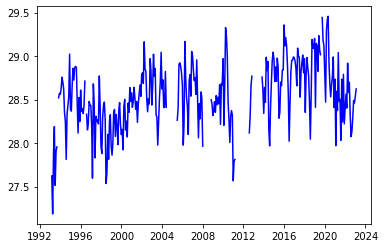

In [39]:
#plt.plot(sl_monthly_df['Date'], sl_monthly_df['Mean'],color="red")
plt.plot(at_monthly_df['Date'], at_monthly_df['Mean'], color="blue")

sl_monthly_df.head()

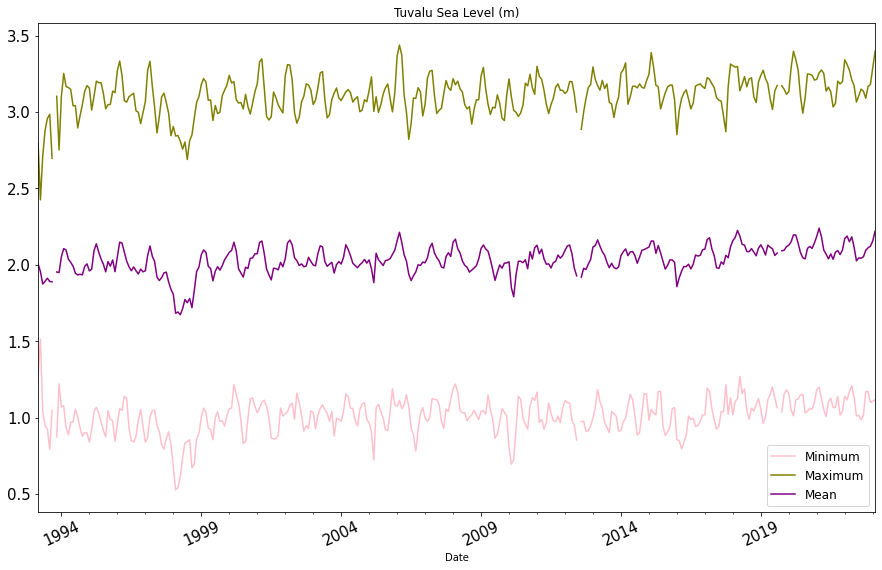

In [40]:
titles = [
    "Minimum",
    "Maximum",
    "Mean",
]

feature_keys = [
    "Minimum",
    "Maximum",
    "Mean",
]

colors = [
    "pink",
    "olive",
    "purple",
]

date_time_key = "Date Time"


def show_raw_visualization(data, main_title):
    time_data = data['Date']
    plt.figure(figsize=(15,9))
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        t_data.plot(
            color = c,
            title = main_title,
            fontsize = 15,
            rot = 25,
            label = titles[i]
        )
    plt.legend(fontsize = 12)
    plt.show()


show_raw_visualization(sl_monthly_df, "Tuvalu Sea Level (m)")

### Air temperatures 

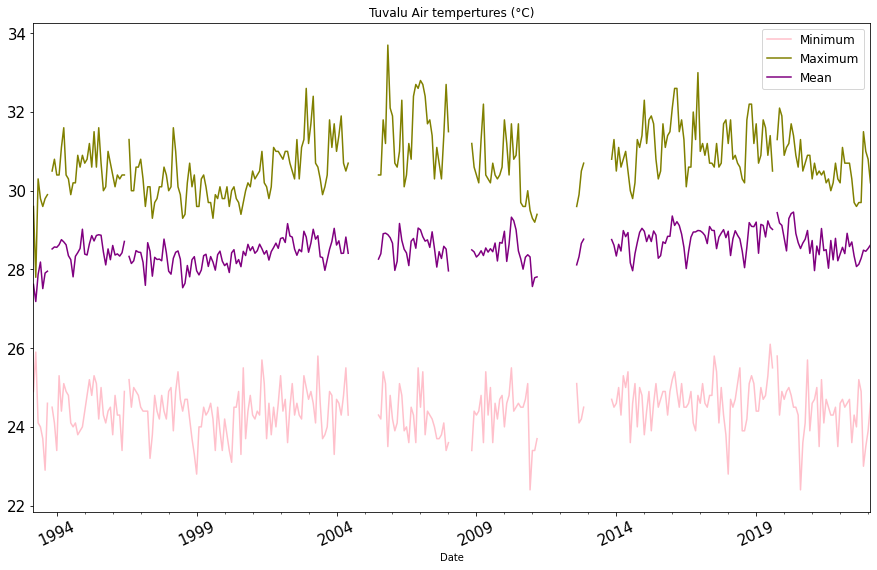

In [41]:
show_raw_visualization(at_monthly_df, "Tuvalu Air tempertures (°C)")

### Water Temperature

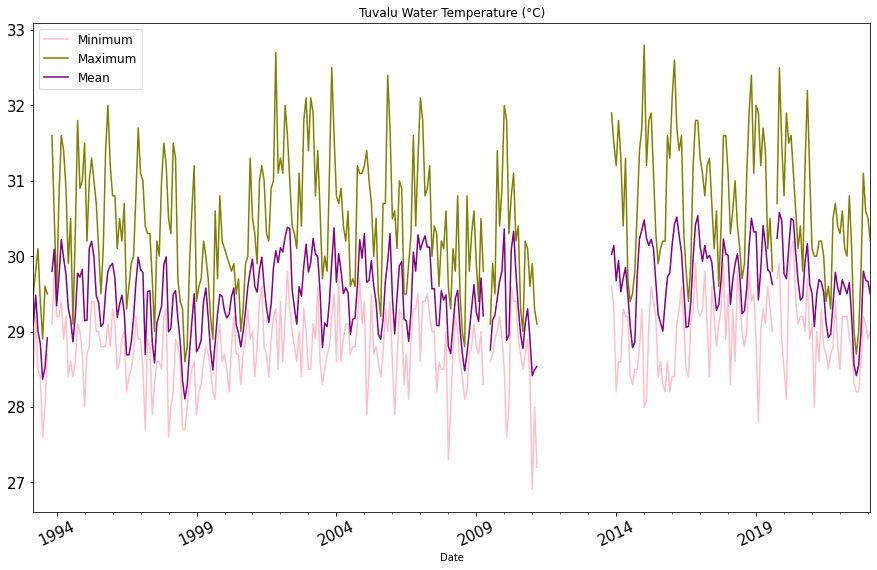

In [42]:
show_raw_visualization(wt_monthly_df, "Tuvalu Water Temperature (°C)")

# Check for time series stationary? 
1) using line plots                                           
2) check summary statistics (mean, variance) for a change over time                            
3) use statistical tests with statistical significance, Augmented Dickey-Fuller test
###  A time series is said to be stationary if series' properties like mean and variance remain a constant over a period of time
<strong> Definition 1,6 If a time series is *strictly stationary*, then all of the multivariate distribution functions for subsets of variables must agree with their counterparts in the shifted set for all values of the shift parameter h.</strong> $$P\{x_{t_1} ≤ c_1,...,x_{t_k} ≤ c_k\} = P\{x_{t_1}+h ≤ c_1,...,x_{t_k}+h ≤ c_k\}$$ <br>
<strong> Definition 1.7 A weakly stationary time series, $x_t$, is a finite variance process such that</strong>
<li>(i) the mean value function, $µ_t = E(x_t) = \sum^{∞}_{−∞}xf_t(x) dx$, is constant and does not depend on time t, and</li>
<li>(ii) the covariance function, $γ(s, t) = E[(x_s − µ_s)(x_t − µ_t)]$, depends on s and t only through their difference |s − t|.<br>
Henceforth, we will use the term stationary to mean weak stationarity; if a process is stationary in the strict sense, we will use the term strictly stationary.

### Because, if a series is stationary, we can say that with high probabilty over time it will follow the same in the future.

<strong>Stationary Time Series:</strong>
The observations in a stationary time series are not dependent on time.
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

In [43]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sl_monthly_df['Mean'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

MissingDataError: exog contains inf or nans